# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تخمین contour</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">این تابع فرآیند تقریب یک شکل کانتور به شکل دیگری متشکل از تعداد کمتری از رئوس است، به گونه ای که فاصله خطوط تقریبی از شکا اولیه برابر با دقت مشخص شده یا کمتر از خطای مشخص شده باشد!
<br/>
بسته به دقتی که ما مشخص می کنیم، یک شکل کانتور را به شکل دیگری با تعداد رئوس کمتر تقریب می زند. این یک پیاده سازی از الگوریتم داگلاس-پیکر است. صفحه ویکی پدیا را برای الگوریتم و نمایش بررسی کنید.
</div>

[Douglas-Peucker](https://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm)

## **Approximating Contours using ApproxPolyDP**

### **Using ApproxPolyDP to approximate contours as a more defined shape**
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.


***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">همچنین از تابع زیر برای محاسبه ی محیط شکل استفاده میکنیم که معمولا خطای قابل تحمل را بر اساس این مقدار مینویسیم
</div>

## Contour Perimeter 
`perimeter = cv2.arcLength(cnt,True)`

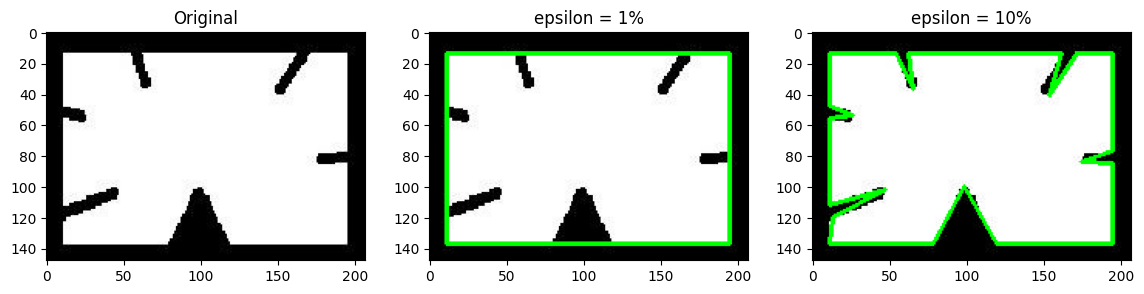

In [2]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('D:/approx.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

#1st contour
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)

first_output = image.copy()
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(first_output, [approx], 0, (0,255,0), 2)

second_output = image.copy()
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(second_output, [approx], 0, (0,255,0), 2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(first_output[...,::-1]);plt.title("epsilon = 1%");
plt.subplot(133);plt.imshow(second_output[...,::-1]);plt.title("epsilon = 10%");

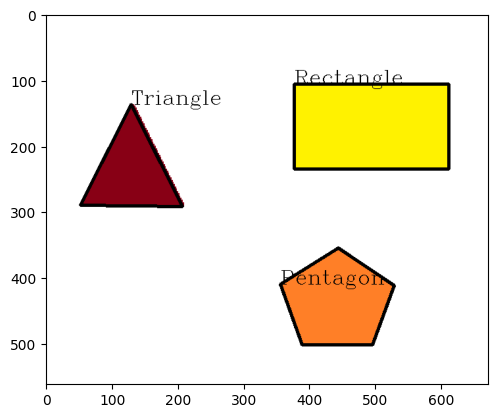

In [3]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('D:/shapes2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
imagecontours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approximations = cv2.approxPolyDP(c, epsilon, True)
    cv2.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv2.putText(image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv2.putText(image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv2.putText(image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv2.putText(image, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv2.putText(image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

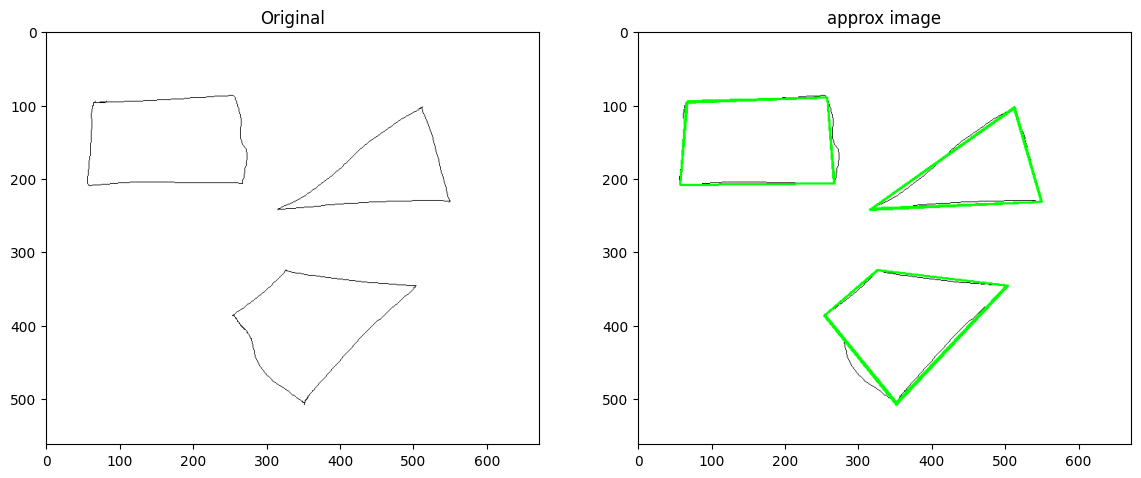

In [4]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread('D:/sketch.png')
 
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()


# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(copy, cmap='gray');plt.title("approx image");

https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html